# Lecture 1: Python Basics and Particle Projectile Simulation
In this lecture, we will cover basic Python concepts and use them to create a particle projectile simulation.

## Motivation

Python is a powerful programming language that is widely used in scientific computing. It is a high-level language that is easy to learn and use. It is also open-source and has a large community of users and developers. These factors make Python an excellent choice for scientific computing.

Jupyter also allows us to combine code, text, LaTeX equations, and visualizations in a single document.

In this lecture, we will cover the basics of Python and use them to create a particle projectile simulation. This simulation will be used to study the motion of a charged particle in an electromagnetic field. This is a fundamental problem in plasma physics, and the simulation will serve as a starting point for more advanced simulations.

<div style="text-align:center">
    <figure>
        <img src="pic2.png" alt="Plasma Examples" style="width: 1000px;">
        <figcaption>Fig.1 Plasma Examples</figcaption>
    </figure>
</div>

The self-consistent interaction between electromagnetic fields and a statistically large ensemble of charged particles forms the foundation of the study of plasma physics. In this context, the dynamics of charged particles are influenced by the electromagnetic fields they generate, while the electromagnetic fields are shaped by the collective motion of the charged particles.

The Lorentz equation governs the motion of individual charged particles in the presence of electromagnetic fields. It is expressed as:

$$m \frac{dv}{dt} = q (E + v \times B)$$

Where:
- $m$ is the mass of the particle,
- $q$ is the charge of the particle,
- $v$ is the velocity of the particle,
- $E$ is the electric field,
- $B$ is the magnetic field.

Maxwell's equations describe the behavior of electromagnetic fields in space and time. These equations capture the fundamental relationships between electric and magnetic fields and their sources, which include charge densities and currents. The relevant equations are:

1. Gauss's Law for Electricity:
$$\nabla \cdot E = \frac{\rho}{\varepsilon_0}$$
Where $\rho$ is the charge density and $\varepsilon_0$ is the vacuum permittivity.

2. Gauss's Law for Magnetism:
$$\nabla \cdot B = 0$$

3. Faraday's Law of Electromagnetic Induction:
$$\nabla \times E = -\frac{\partial B}{\partial t}$$

4. Ampère's Law with Maxwell's Addition:
$$\nabla \times B = \mu_0 J + \mu_0 \varepsilon_0 \frac{\partial E}{\partial t}$$
Where $J$ is the current density, $\mu_0$ is the vacuum permeability.

The self-consistency emerges when the charged particles, represented by the current density $J$ and charge density $\rho$, are influenced by the electromagnetic fields as per the Lorentz equation. Simultaneously, the electromagnetic fields evolve according to Maxwell's equations, which in turn depend on the charge and current distributions of the charged particles.

This interplay between the Lorentz equation and Maxwell's equations results in a self-consistent coupling between the motion of charged particles and the electromagnetic fields they generate. It leads to complex collective behaviors and phenomena, such as plasma oscillations, wave-particle interactions, and instabilities, which are fundamental in plasma physics research and applications.

<div style="text-align:center">
    <figure>
        <img src="pic1.png" alt="Plasma Examples" style="width: 700px;">
        <figcaption>Fig.2 Fields and Particles in Plasma Simulation</figcaption>
    </figure>
</div>


## Python Basics
### Arrays, Loops, Plots, and Animations

In this section, we will explore some Python basics and learn about arrays, loops, plots, and animations.

Let's start by importing the necessary libraries for our Python code:

In [25]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


Now, let's create an array and use it to plot a simple sinusoidal function using matplotlib:

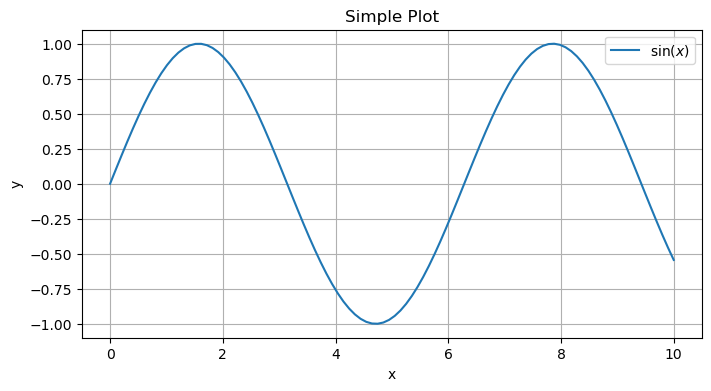

In [26]:
# Create an array
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a simple plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='$\sin(x)$')
# plt.plot(x, y, label='sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple Plot')
plt.legend()
plt.grid(True)
plt.show()

## Particle Projectile Simulation
### Modeling Projectile Motion with Energy Loss

Imagine we have a particle projected vertically upwards. It experiences gravitational
attraction and loses some energy upon bouncing off the ground. Let's break down
the simulation into teaching sections.

## Equation of Motion of the Projectile

In the context of our particle projectile simulation, we need to understand the equation of motion governing the vertical motion of the particle. The equation of motion for the vertical direction can be given as:

$$
s(t) = s_0 + v_0 t - \frac{1}{2} g t^2
$$

Where:
- $s(t)$ is the height of the particle at time $t$,
- $s_0$ is the initial height,
- $v_0$ is the initial velocity,
- $g$ is the acceleration due to gravity.

In our simulation, we are also considering energy loss upon bouncing off the ground. This is modeled by reducing the particle's velocity and height according to the energy loss fraction upon each bounce. The updated equations for the velocity and height after bouncing are:

$$
v_{\text{new}} = -v_{\text{old}} \times \text{energy\_loss\_fraction}
$$

The concept of a constant gravitational acceleration $ g $ in the context of projectile motion can be analogous to a constant electric field $ E $ acting on a particle with charge $ q $ in electromagnetics.

For a particle experiencing a constant gravitational acceleration $ g $, its equation of motion in the vertical direction is given by:

$$
s(t) = s_0 + v_0 t - \frac{1}{2} g t^2
$$

In electromagnetics, a charged particle with charge $ q $ experiencing a constant electric field $ E $ will follow a similar equation of motion in the absence of other forces:

$$ s(t) = s_0 + v_0 t + \frac{1}{2} \frac{qE}{m} t^2 $$

Where:
- $ s(t) $ is the displacement of the particle at time $ t $,
- $ s_0 $ is the initial displacement,
- $ v_0 $ is the initial velocity,
- $ g $ is the gravitational acceleration,
- $ q $ is the charge of the particle,
- $ E $ is the electric field strength,
- $ m $ is the mass of the particle.

This analogy highlights that in both scenarios, the acceleration contributes to the change in the particle's position over time, whether it is


### Section 1: Importing Libraries and Setting Up Parameters
Let's start by importing the necessary libraries and setting up the parameters for our simulation.

In [27]:
# Parameters
initial_height = 10.0  # meters
initial_velocity = 20.0  # m/s
energy_loss_fraction = 0.8
gravity = 9.81  # m/s^2

### Section 2: Time of Flight and Maximum Height
Calculate the time of flight and maximum height of the particle.

In [28]:
# Time of flight
time_of_flight = (2 * initial_velocity) / gravity

# Maximum height
max_height = (initial_velocity ** 2) / (2 * gravity)

### Section 3: Simulating the Bouncing Motion
Simulate the particle's motion and bouncing off the ground with energy loss.

In [40]:
# Time step
dt = 0.1  # seconds

# Initialize arrays to store time, height, and velocity
time = [0.0]
height = [initial_height]
velocity = [initial_velocity]

# Simulation loop
# while height[-1] > 1:
while time[-1] < 20:
    new_velocity = velocity[-1] - gravity * dt
    new_height = height[-1] + new_velocity * dt
    if new_height < 0:
        new_height = -new_height * energy_loss_fraction
        new_velocity = -new_velocity * energy_loss_fraction
    velocity.append(new_velocity)
    height.append(new_height)
    time.append(time[-1] + dt)

### Section 4: Creating an Animation
Visualize the particle's motion as an animation.

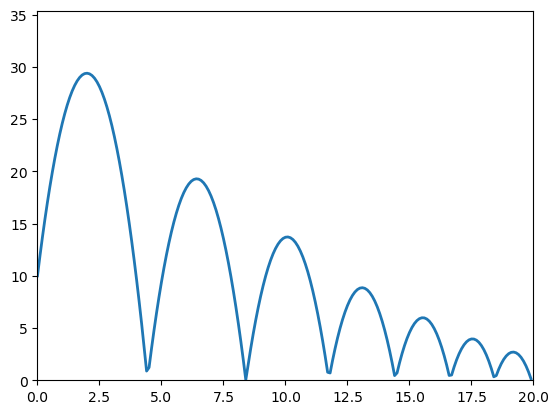

In [41]:
# Create a figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlim(0, max(time))
ax.set_ylim(0, max_height + 15)
line, = ax.plot([], [], lw=2)

# Animation initialization function
def init():
    line.set_data([], [])
    return line,

# Animation update function
def update(frame):
    xdata = time[:frame]
    ydata = height[:frame]
    line.set_data(xdata, ydata)
    return line,

# Create the animation
ani = FuncAnimation(fig, update, frames=len(time), init_func=init, blit=True)

# Display the animation
from IPython.display import HTML
HTML(ani.to_jshtml())

## Parabola of Safety